In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [ ]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

https://www.kaggle.com/datasets/ashfakyeafi/air-passenger-data-for-time-series-analysis


In [ ]:
#import dataset
df = pd.read_csv('/content/drive/MyDrive/kaggle/AirPassengers.csv')

In [ ]:
# check shape
df.shape

(144, 2)

In [ ]:
# check variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
# show first 5 rows
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


1) Plot the time series, along with any logical or necessary differences to get a stationary dataset.


<function matplotlib.pyplot.show(close=None, block=None)>

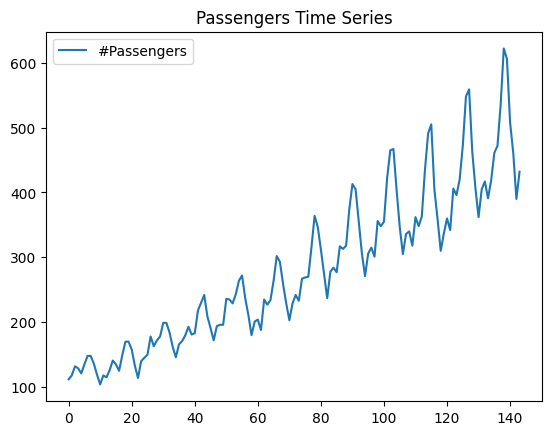

In [ ]:
# look at the time series data
df.plot()
plt.title('Passengers Time Series')
plt.show

The x-axis needs to be changed to be by date

In [ ]:
df["Month"]=pd.to_datetime(df["Month"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


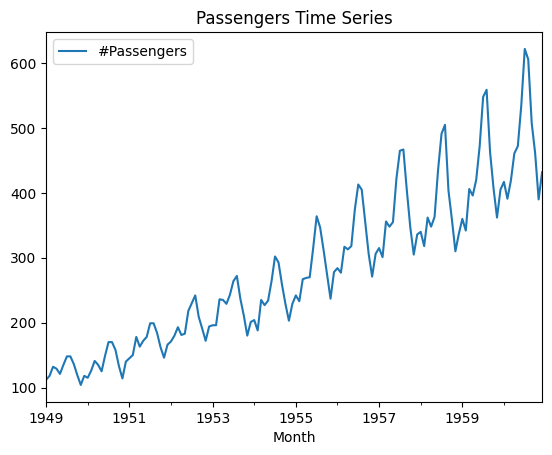

In [ ]:

df.plot(x = 'Month', y = '#Passengers')
plt.title('Passengers Time Series')
plt.show()

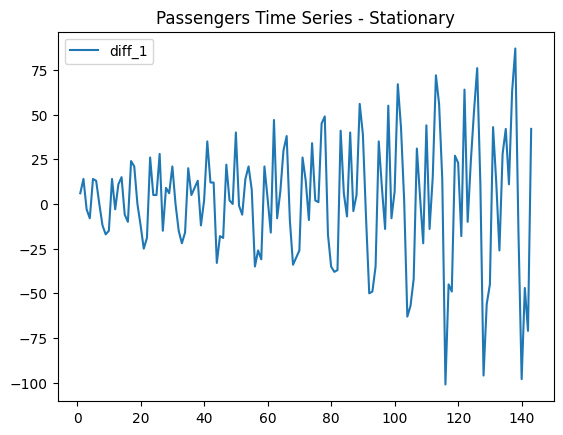

In [ ]:
# convert to stationary dataset

df['diff_1'] = df['#Passengers'] - df['#Passengers'].shift()
df.plot(y='diff_1')
plt.title('Passengers Time Series - Stationary')
plt.show()

It looks like the difference gets larger as time increases

2) Generate and interpret a PACF for the time series and discuss any differences in correlations.

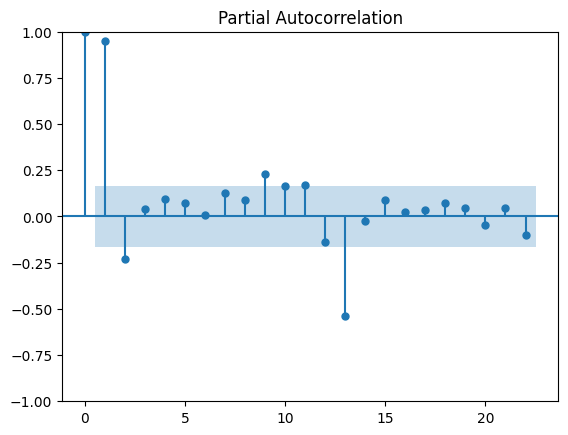

In [ ]:
# look at PACF for initial data to estimate parameter p

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(df['#Passengers'])
plt.show()

There is a high autocorrelation at 1 and a slightly higher than average autocorrelation at 9, and a large negative at 13

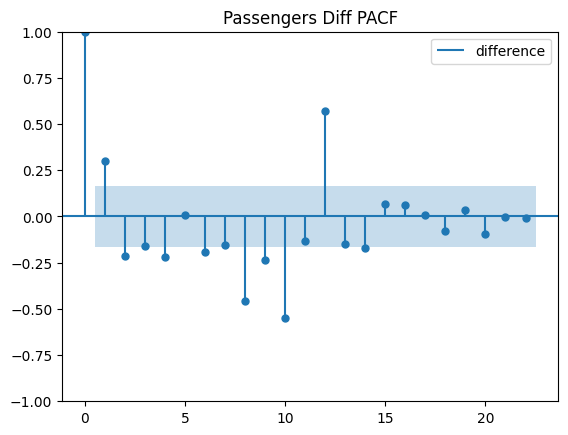

In [ ]:
# look at PSCF for difference data

plot_pacf((df.diff_1[1:]))
plt.title("Passengers Diff PACF")
plt.legend(['difference'])
plt.show()

The highest autocorrelation is at 12 then 1, with high negetaives at 8, 9, and 10

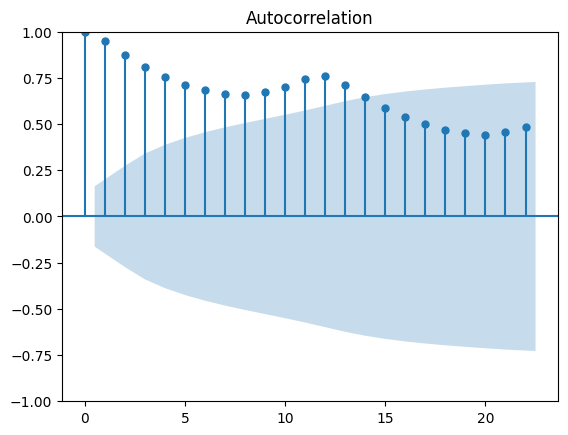

In [ ]:
# look at ACF for initial data to estimate parameter q

plot_acf(df['#Passengers'])
plt.show()

highest at 1, with other high values from 2 to 13

To start, it looks like 1 and 1 are th best values for p and q

3) Generate five ARIMA specifications and evaluate their efficacy at modeling your data.


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# VERSION 1: (1,0,0)

model = ARIMA(df['#Passengers'], order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -711.090
Date:                Mon, 18 Mar 2024   AIC                           1428.181
Time:                        01:01:33   BIC                           1437.090
Sample:                             0   HQIC                          1431.801
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.2943     66.403      4.221      0.000     150.146     410.442
ar.L1          0.9645      0.019     51.535      0.000       0.928       1.001
sigma2      1118.5409    122.133      9.158      0.0

In [ ]:
# VERSION 2: (0,1,0)

model = ARIMA(df['#Passengers'], order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -705.955
Date:                Mon, 18 Mar 2024   AIC                           1413.909
Time:                        01:01:55   BIC                           1416.872
Sample:                             0   HQIC                          1415.113
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1136.4015    119.157      9.537      0.000     902.858    1369.945
Ljung-Box (L1) (Q):                  13.39   Jarque-Bera (JB):                 4.99
Prob(Q):                              0.00   Pr

In [ ]:
# VERSION 3: (1,1,0)

model = ARIMA(df['#Passengers'], order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -698.926
Date:                Mon, 18 Mar 2024   AIC                           1401.852
Time:                        01:02:16   BIC                           1407.778
Sample:                             0   HQIC                          1404.260
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3066      0.080      3.849      0.000       0.150       0.463
sigma2      1029.2429    103.738      9.922      0.000     825.920    1232.566
Ljung-Box (L1) (Q):                   0.66   Jarque-

In [ ]:
# VERSION 4: (13,1,0)
# because we saw a high autocorrelation at 13 for the differences

model_13_1_0 = ARIMA(df['#Passengers'], order=(13,1,0))
model_13_1_0_fit = model_13_1_0.fit()
print(model_13_1_0_fit.summary())
print('Residuals Description')
print(model_13_1_0_fit.resid.describe())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                ARIMA(13, 1, 0)   Log Likelihood                -557.368
Date:                Mon, 18 Mar 2024   AIC                           1142.736
Time:                        01:22:06   BIC                           1184.216
Sample:                             0   HQIC                          1159.591
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2761      0.084     -3.303      0.001      -0.440      -0.112
ar.L2         -0.0971      0.055     -1.756      0.079      -0.206       0.011
ar.L3         -0.0052      0.042     -0.125      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# VERSION 5: (13,2,0)
# because we saw a high autocorrelation at 13 for the differences

model = ARIMA(df['#Passengers'], order=(13,2,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                ARIMA(13, 2, 0)   Log Likelihood                -565.396
Date:                Mon, 18 Mar 2024   AIC                           1158.792
Time:                        01:18:29   BIC                           1200.174
Sample:                             0   HQIC                          1175.608
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1333      0.130     -8.734      0.000      -1.388      -0.879
ar.L2         -1.1900      0.200     -5.954      0.000      -1.582      -0.798
ar.L3         -1.1219      0.199     -5.637      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


4) Finally, choose one specification and make a case for it as a logical model for your dataset.

The 4th version that had a p of 13 and a q of 1 had the lowest AIC score (1142), but many of the terms were not statistically significant. The log likelihood for version 4 was closest to 0

Text(0.5, 1.0, 'Histogram of Residuals')

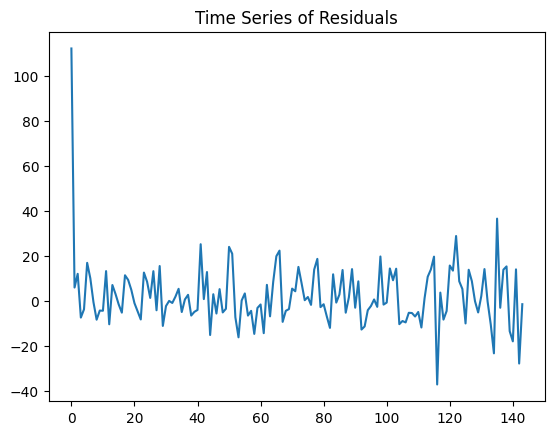

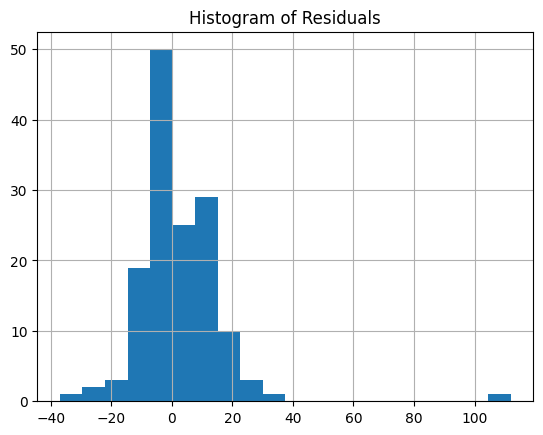

In [ ]:
# look at the residuals

residuals = pd.DataFrame(model_13_1_0_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

The residuals seem to fluctuate around a mean of 0 and have a fairly uniform variance, with slight increase tot he right. The histogram approximates a normal distribution with mean zero.